# TAREA NO. 3 - ESTADÍSTICA MULTIVARIADA: REGRESIÓN MULTIVARIADA

## 1. Contexto de la base de datos
Este conjutno de datos contiene seis meses de datos de consumo eléctrico de un hogar, recogidos entre enero y junio de 2007. Los datos incluyen información sobre potencia activa global, potencia reactiva global, tensión, intensidad global, submedición 1 (cocina), submedición 2 (lavadero) y submedición 3 (calentador de agua eléctrico y aire acondicionado). Con 260.640 mediciones en total, el objetivo es predecir o estimar el consumo eléctrico de los hogares.

| Nombre de la columna | Descripción |
| --- | --- |
| Fecha | La fecha de la observación. (Fecha) |
| Hora | La hora de la observación. (Hora) |
| Potencia_activa_global | La potencia activa total consumida por el hogar (kilovatios). (Numérico) |
| Potencia_reactiva_global | La potencia reactiva total consumida por el hogar (kilovatios). (Numérico) |
| Voltaje | El voltaje al cual se entrega la electricidad al hogar (voltios). (Numérico) |
| Intensidad_global | La intensidad de corriente promedio entregada al hogar (amperios). (Numérico) |
| Sub_medición_1 | La potencia activa consumida por la cocina (kilovatios). (Numérico) |
| Sub_medición_2 | La potencia activa consumida por la lavandería (kilovatios). (Numérico) |
| Sub_medición_3 | La potencia activa consumida por el calentador de agua eléctrico y el aire acondicionado (kilovatios). (Numérico) |

La variable respuesta para el modelo de regresión múltiple es la potencia aparente global en la red. A priori, esta variable no está incluida dentro del conjunto de datos, por lo que es necesario obtenerla a parir de la potencia reactiva y activa global que si están disponibles en el conjunto de datos.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

## 1. Análisis descriptivo de los datos

### 1.1. Limpieza de los datos

In [16]:
df = pd.read_csv('database.csv')
df = df.replace('?', np.nan)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256869 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  256869 non-null  int64  
 1   Date                   256869 non-null  object 
 2   Time                   256869 non-null  object 
 3   Global_active_power    256869 non-null  object 
 4   Global_reactive_power  256869 non-null  object 
 5   Voltage                256869 non-null  object 
 6   Global_intensity       256869 non-null  object 
 7   Sub_metering_1         256869 non-null  object 
 8   Sub_metering_2         256869 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 21.6+ MB


In [17]:
df_no_time = df.drop(columns=['index', 'Date', 'Time'])
df_no_time.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.58,0.136,241.97,10.6,0,0,0.0
1,2.552,0.1,241.75,10.4,0,0,0.0
2,2.55,0.1,241.64,10.4,0,0,0.0
3,2.55,0.1,241.71,10.4,0,0,0.0
4,2.554,0.1,241.98,10.4,0,0,0.0


### 1.2. Estandarización de los datos

In [18]:
scaler = StandardScaler().fit(df_no_time)
df_no_time_scaled = scaler.transform(df_no_time)
df_no_time_scaled = pd.DataFrame(df_no_time_scaled, columns=df_no_time.columns)
df_no_time_scaled.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1.197349,0.109691,0.768490,1.125165,-0.198731,-0.251926,-0.712354
1,1.173657,-0.212106,0.707256,1.085161,-0.198731,-0.251926,-0.712354
2,1.171965,-0.212106,0.676639,1.085161,-0.198731,-0.251926,-0.712354
3,1.171965,-0.212106,0.696122,1.085161,-0.198731,-0.251926,-0.712354
4,1.175350,-0.212106,0.771273,1.085161,-0.198731,-0.251926,-0.712354


In [19]:
df_no_time_scaled.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.568690e+05,2.568690e+05,2.568690e+05,2.568690e+05,2.568690e+05,2.568690e+05,2.568690e+05
mean,-2.283748e-16,-1.006885e-16,3.677011e-15,1.681830e-17,-2.080158e-17,-2.367840e-17,8.696831e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-9.163219e-01,-1.105989e+00,-4.375150e+00,-9.150456e-01,-1.987307e-01,-2.519262e-01,-7.123541e-01
25%,-7.352468e-01,-1.105989e+00,-7.122552e-01,-7.150249e-01,-1.987307e-01,-2.519262e-01,-7.123541e-01
50%,-5.084798e-01,-1.763511e-01,1.116179e-01,-4.750001e-01,-1.987307e-01,-2.519262e-01,-7.123541e-01
75%,3.732038e-01,6.281435e-01,7.239560e-01,3.650867e-01,-1.987307e-01,-1.011273e-01,1.364186e+00
max,8.042666e+00,9.155786e+00,3.251242e+00,8.285905e+00,1.143445e+01,1.151039e+01,1.730635e+00


### 1.3. Extraer la variable que se quiere predecir

In [ ]:
# Convertir las columnas a tipo numérico
df_no_time_scaled = df_no_time_scaled.apply(pd.to_numeric, errors='coerce')
df_no_time_scaled['Global_apparent_power'] = np.sqrt(df_no_time_scaled['Global_active_power']**2 + df_no_time_scaled['Global_reactive_power']**2)
df_no_time_scaled = df_no_time_scaled.drop(columns=['Global_active_power', 'Global_reactive_power'])

In [ ]:
df_no_time_scaled.describe()

### 1.3. Análisis de correlación de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256869 entries, 0 to 256868
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Voltage                256869 non-null  float64
 1   Global_intensity       256869 non-null  float64
 2   Sub_metering_1         256869 non-null  float64
 3   Sub_metering_2         256869 non-null  float64
 4   Sub_metering_3         256869 non-null  float64
 5   Global_apparent_power  256869 non-null  float64
dtypes: float64(6)
memory usage: 11.8 MB
None


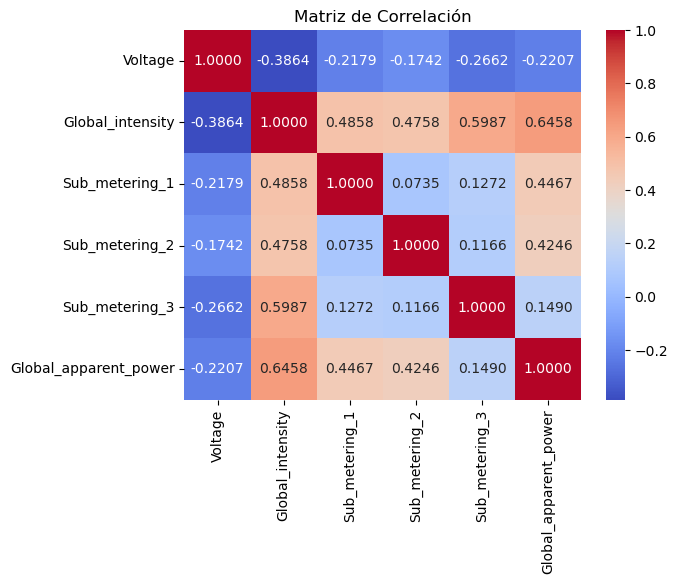

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_no_time_scaled.corr()

# Mostrar la matriz de correlación
print(df_no_time_scaled.info())

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Matriz de Correlación')
plt.show()

El análisis de correlación muestra como la intensidad de corriente tiene una correlacion positiva muy fuerte con la potencia aparente global.

### 1.3. Visualización de los datos: histograma y box-plot

In [ ]:
# Crear histogramas para cada variable
df_no_time.hist(bins=100, figsize=(20, 7), layout=(2, 4), grid=False)
plt.suptitle('Histogramas de las Variables', fontsize=13)
plt.show()

# Crear boxplots para cada variable
plt.figure(figsize=(20, 7))
for i, column in enumerate(df_no_time.columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_no_time[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.suptitle('Boxplots de las Variables', y=1.1, fontsize=16)
plt.show()

(...)

### 1.4. Análisis de normalidad de las variables

In [ ]:
from scipy.stats import kstest

# Realizar el test de Kolmogorov-Smirnov para cada variable
for column in df_no_time.columns:
    statistic, p_value = kstest(df_no_time[column], 'norm')
    print(f'Variable: {column}')
    print(f'Estadístico de prueba: {statistic}')
    print(f'Valor p: {p_value}')
    print('-------------------------')

De esta forma, los valores p de cada una de las variables de 0.0, por lo que se rechaza la hipotesis nula y se concluye que los datos no siguen una distribución normal.

### 1.5. Análisis de componentes principales (ACP)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
df_no_time_scaled = scaler.fit_transform(df_no_time)

# Crear el modelo PCA y ajustar los datos
pca = PCA(n_components=2)  # Puedes cambiar el número de componentes principales
principal_components = pca.fit_transform(df_no_time_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las etiquetas originales
df_pca['Global_apparent_power'] = df_no_time['Global_apparent_power'].values

# Mostrar la varianza explicada por cada componente principal
print('Varianza explicada por cada componente principal:', pca.explained_variance_ratio_)

In [ ]:
# Crear el biplot
def biplot(df_pca, pca, df_no_time_scaled):
    plt.figure(figsize=(10, 7))
    
    # Scatter plot de los componentes principales
    sns.scatterplot(x='PC1', y='PC2', hue='Global_apparent_power', data=df_pca, palette='viridis')
    
    # Añadir las flechas de las variables originales
    for i, (var, pc1, pc2) in enumerate(zip(df_no_time.columns, pca.components_[0], pca.components_[1])):
        plt.arrow(0, 0, pc1 * 20., pc2 * 20., color='r', alpha=0.5)
        plt.text(pc1 * (20.5), pc2 * (20.5), var, color='k', ha='center', va='center')
    
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('Biplot de Componentes Principales')
    plt.grid()
    plt.show()

# Llamar a la función biplot
biplot(df_pca, pca, df_no_time_scaled)